# Detectors

In [93]:
import sys
sys.path.append('..')

In [94]:
import numpy
import scipy.signal
import matplotlib.pyplot
import matplotlib.cm
import pathlib
import PIL.Image

In [95]:
matplotlib.pyplot.rcParams.update({'font.size': 22})

## Read image

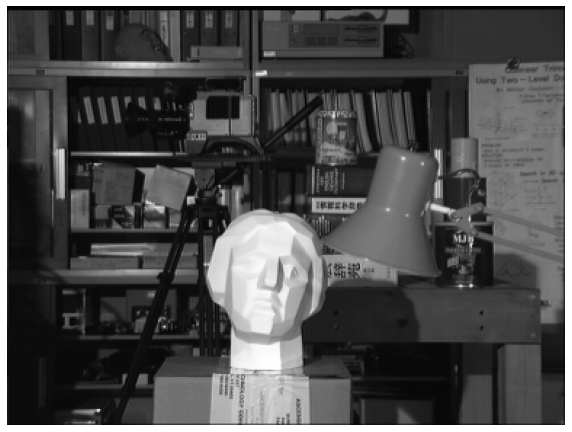

In [96]:
# Open image and convert to grayscale
path: pathlib.Path = pathlib.Path('./images/tsukuba/scene1.row3.col1.ppm')
img = numpy.array(PIL.Image.open(str(path)).convert('L'))

figure = matplotlib.pyplot.figure(figsize=(10, 10))

matplotlib.pyplot.axis('off')
# matplotlib.pyplot.title('Image I')
_ = matplotlib.pyplot.imshow(img, cmap=matplotlib.cm.gray)

## Responses

### Moravec

In [97]:
# Parameters
SIZE_SEARCH = 3
SIZE_NEIGH = 3
EPSILON = 0.8

In [98]:
import eagle.points.response
response = eagle.points.response.moravec(img, SIZE_SEARCH)
response_prime = eagle.points.response.remove_non_maxima(response, SIZE_NEIGH)

In [99]:
x, y = eagle.points.response.select_with_threshold(response_prime, EPSILON)

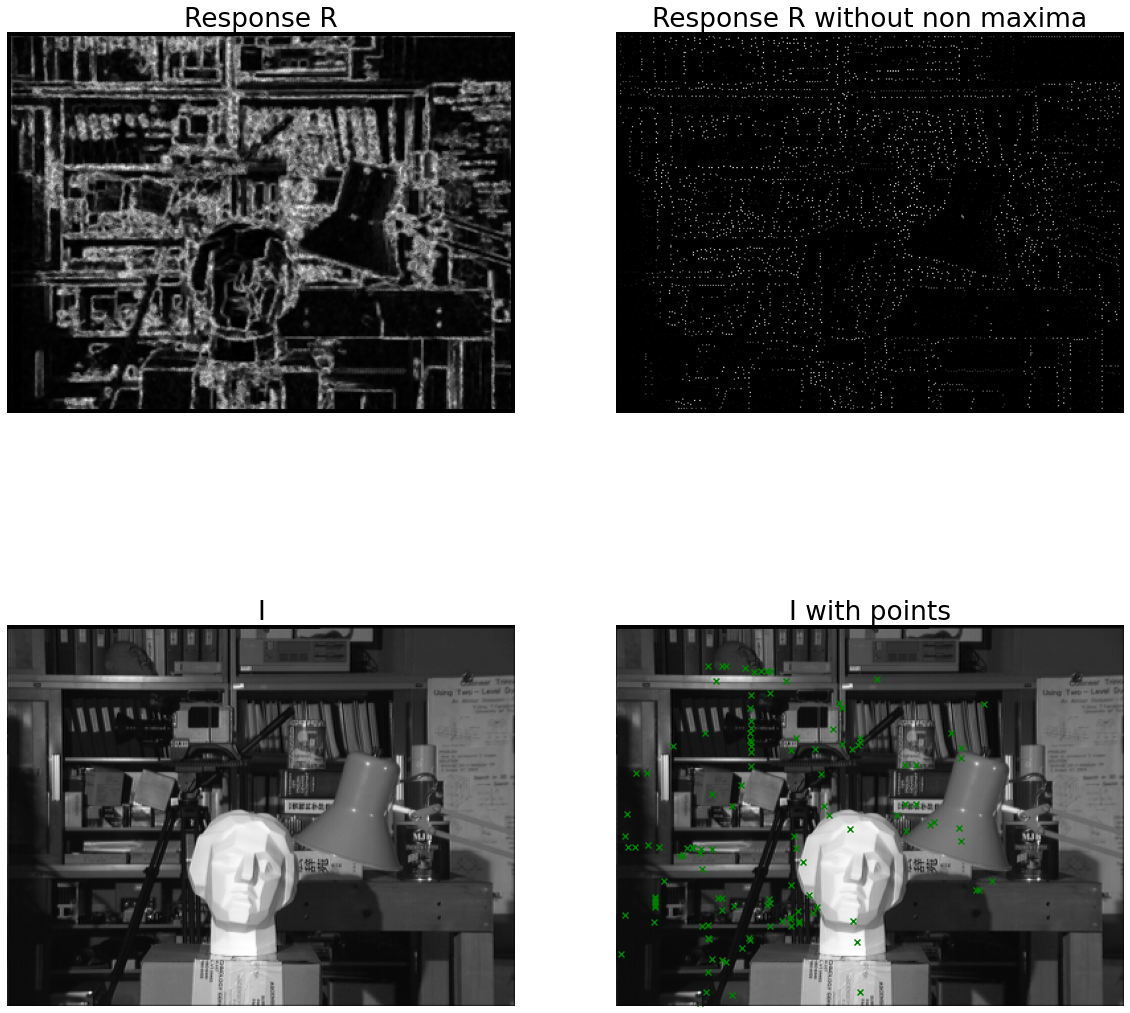

In [100]:
figure = matplotlib.pyplot.figure(figsize=(20, 20))

matplotlib.pyplot.subplot(2, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R')
_ = matplotlib.pyplot.imshow(response, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R without non maxima')
_ = matplotlib.pyplot.imshow(response_prime, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 3)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I')
_ = matplotlib.pyplot.imshow(img, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 4)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I with points')
matplotlib.pyplot.scatter(x, y, marker='x', color="green")
_ = matplotlib.pyplot.imshow(img, cmap='gray')

### Kitchen-Rosenfeld

In [101]:
# Parameters
SIZE_NEIGH = 3
EPSILON = 0.3

In [102]:
import eagle.points.response
response = eagle.points.response.kitchen_rosenfeld(img)
response_prime = eagle.points.response.remove_non_maxima(response, SIZE_NEIGH)

In [103]:
x, y = eagle.points.response.select_with_threshold(response_prime, EPSILON)

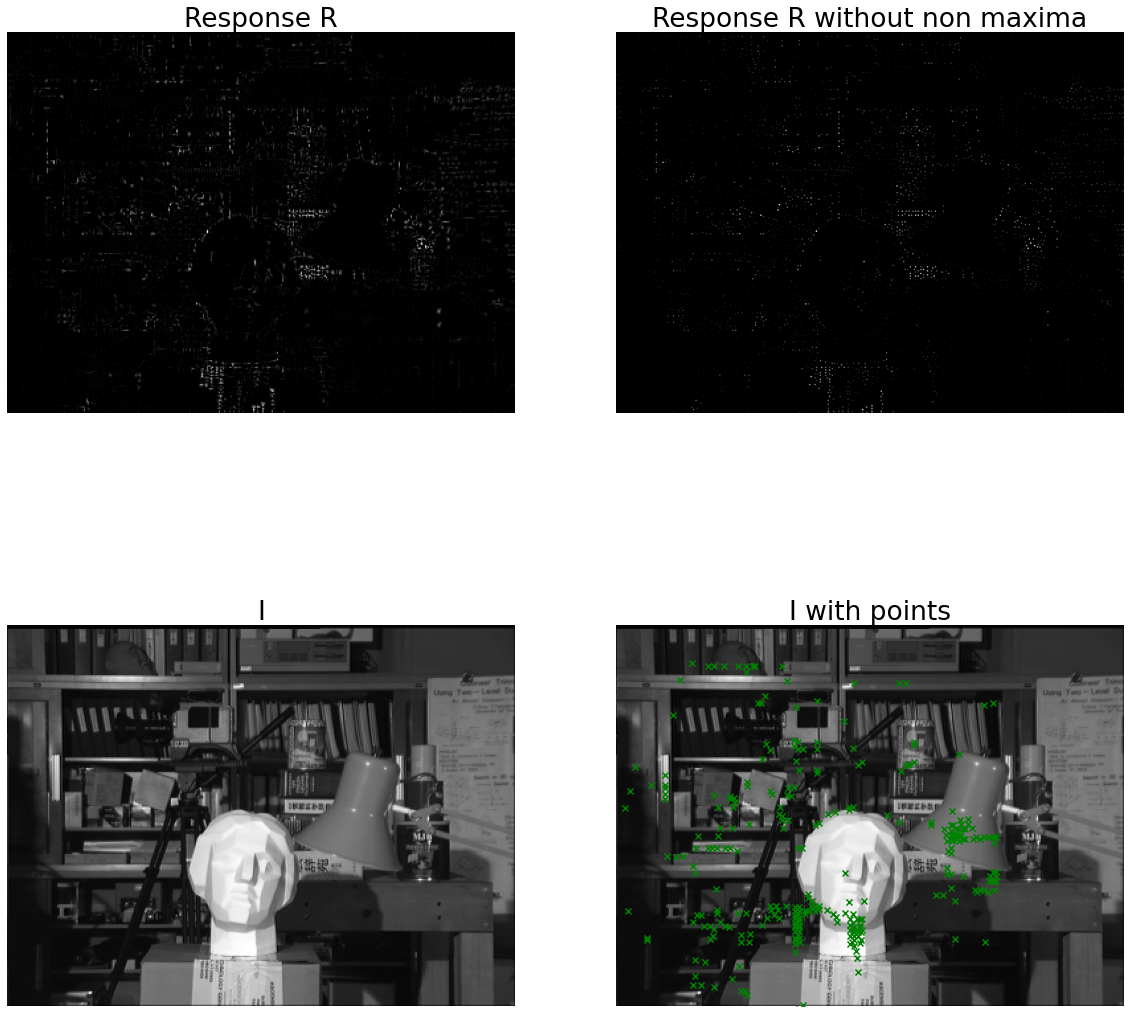

In [104]:
figure = matplotlib.pyplot.figure(figsize=(20, 20))

matplotlib.pyplot.subplot(2, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R')
_ = matplotlib.pyplot.imshow(response, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R without non maxima')
_ = matplotlib.pyplot.imshow(response_prime, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 3)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I')
_ = matplotlib.pyplot.imshow(img, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 4)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I with points')
matplotlib.pyplot.scatter(x, y, marker='x', color='green')
_ = matplotlib.pyplot.imshow(img, cmap='gray')

### Beaudet

In [105]:
# Parameters
SIZE_NEIGH = 3
EPSILON = 0.1

In [106]:
import eagle.points.response
response = eagle.points.response.beaudet(img)
response_prime = eagle.points.response.remove_non_maxima(response, SIZE_NEIGH)

In [107]:
x, y = eagle.points.response.select_with_threshold(response_prime, EPSILON)

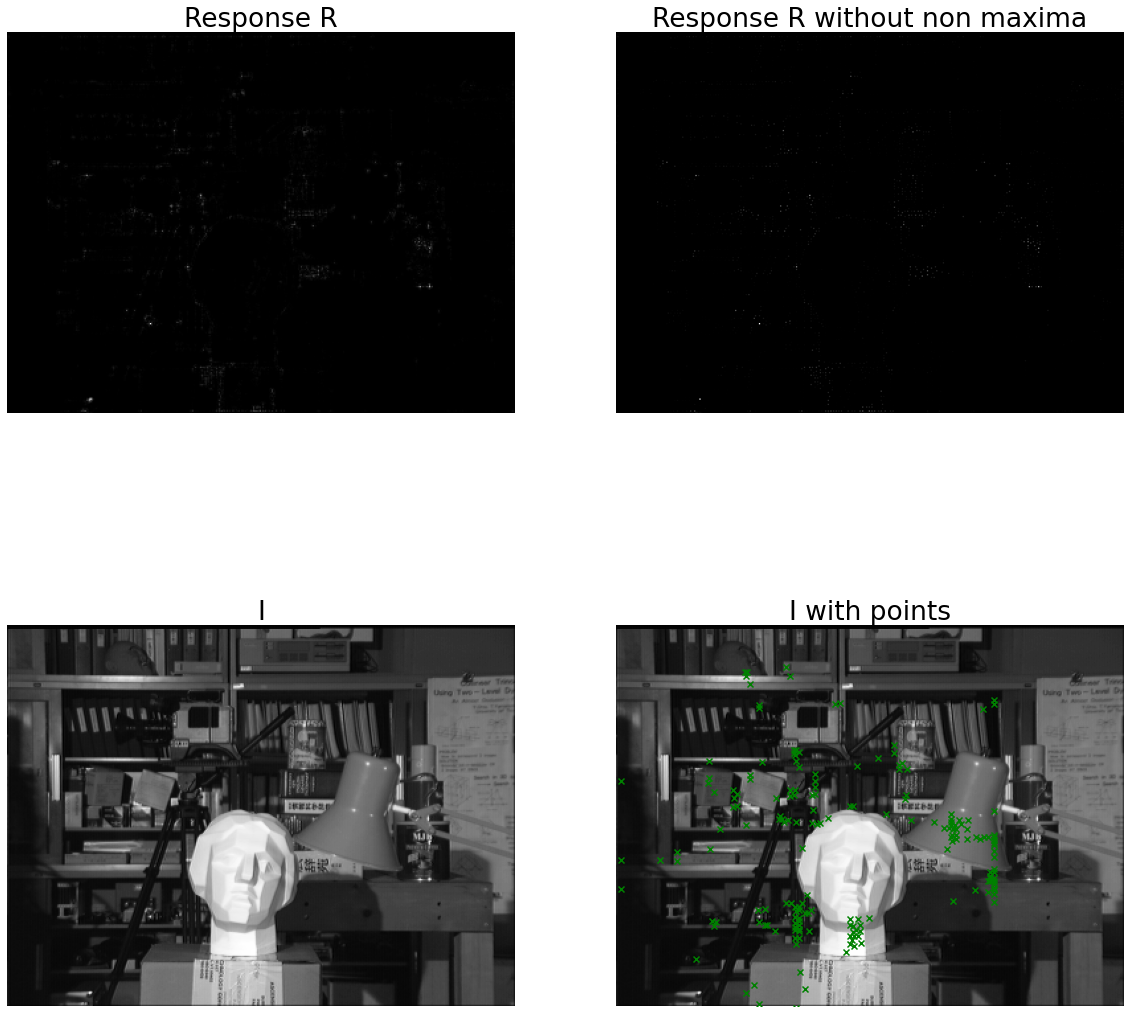

In [108]:
figure = matplotlib.pyplot.figure(figsize=(20, 20))

matplotlib.pyplot.subplot(2, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R')
_ = matplotlib.pyplot.imshow(response, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R without non maxima')
_ = matplotlib.pyplot.imshow(response_prime, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 3)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I')
_ = matplotlib.pyplot.imshow(img, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 4)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I with points')
matplotlib.pyplot.scatter(x, y, marker='x', color="green")
_ = matplotlib.pyplot.imshow(img, cmap='gray')

### Harris

In [109]:
# Parameters
SIZE_NEIGH = 3
EPSILON = 0.1
# THRESHOLD = 50

In [110]:
import eagle.points.response

response = eagle.points.response.harris(
    img,
    SIZE_SEARCH,
    (0, 0.1),
    method='harris_plessey'
)

response_prime = eagle.points.response.remove_non_maxima(response, SIZE_NEIGH)

In [111]:
x, y = eagle.points.response.select_with_threshold(response_prime, EPSILON)

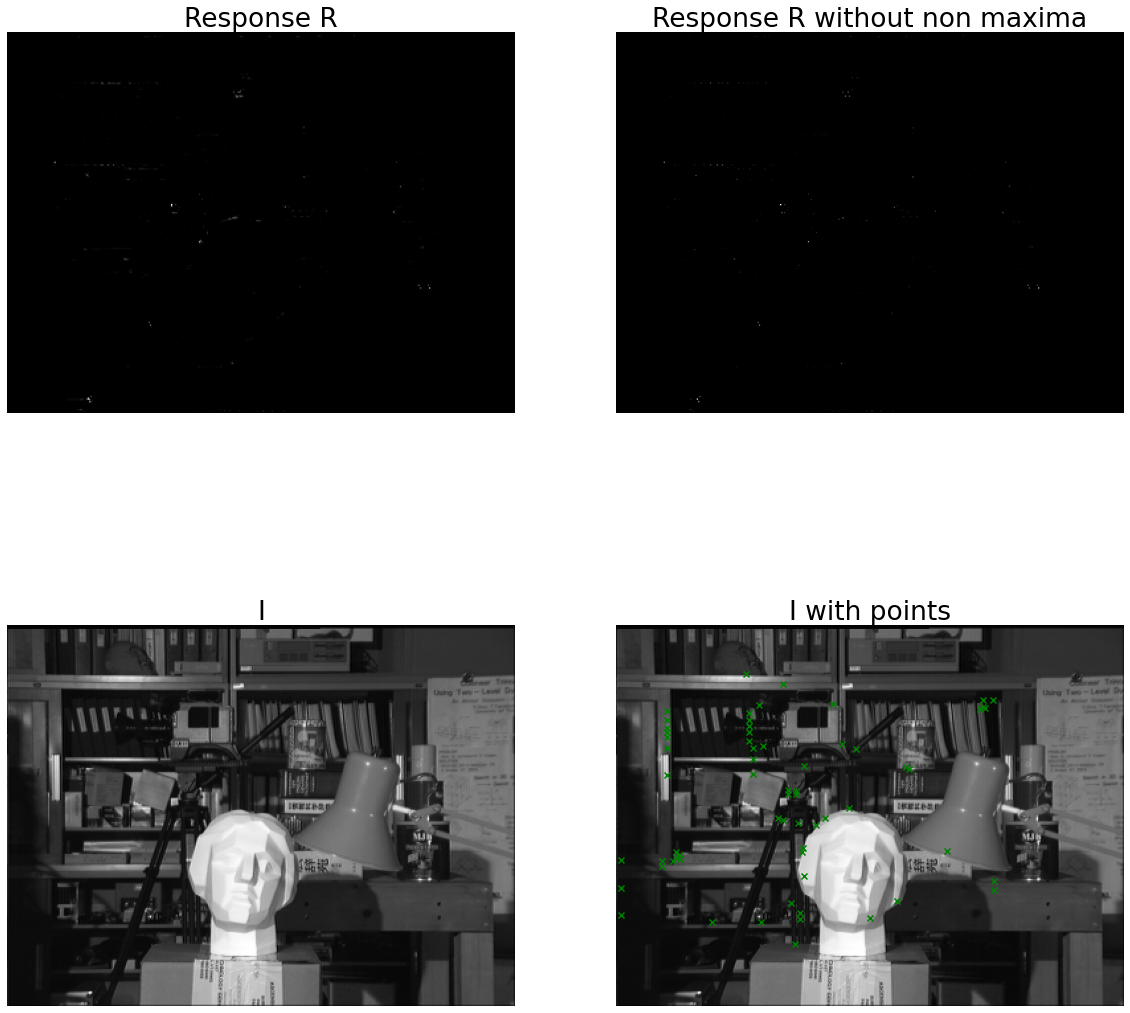

In [112]:
figure = matplotlib.pyplot.figure(figsize=(20, 20))

matplotlib.pyplot.subplot(2, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R')
_ = matplotlib.pyplot.imshow(response, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Response R without non maxima')
_ = matplotlib.pyplot.imshow(response_prime, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 3)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I')
_ = matplotlib.pyplot.imshow(img, cmap='gray')

matplotlib.pyplot.subplot(2, 2, 4)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('I with points')
matplotlib.pyplot.scatter(x, y, marker='x', color="green")
_ = matplotlib.pyplot.imshow(img, cmap='gray')